In [155]:
#Review and analysis of first kprototypes project
#url: https://www.youtube.com/watch?v=8eATPLDJ0NQ&ab_channel=AIEngineering


In [156]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt

In [157]:
#Data

df = pd.read_csv("mkt.csv")
df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [158]:
#HERE_1: rescale numerical features
df_categorical = df.select_dtypes(exclude= np.number)
df_numerical = df.select_dtypes(include= np.number)


sc = StandardScaler() #(x- mean)/std
X_array = sc.fit_transform(df_numerical.values)
X_sc = pd.DataFrame(X_array, columns = df_numerical.columns)

In [159]:
#Rejoin
df_total = pd.concat((df_categorical, X_sc), axis = 1)
df_total.head()

df_opt = df_total.copy()

In [160]:
df_total.head()

,Customer,State,Coverage,loc_type,Vehicle_Class,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
0,BU79786,Washington,Basic,Suburban,Two-Door Car,-0.772349,0.239359,-0.692321,1.684521,-1.535588,0.027591,-0.950653
1,AI49188,Nevada,Premium,Suburban,Two-Door Car,0.684632,-0.069518,0.434436,0.293427,-0.352508,0.746670,-0.138215
2,HB64268,Washington,Basic,Rural,Four-Door Car,-0.765128,-0.272405,-0.576756,-0.302756,-0.137403,-0.948856,2.043365
3,OC83172,Oregon,Basic,Rural,Two-Door Car,0.018143,0.512069,-0.692321,-0.104028,1.655142,-0.864733,0.336117
4,XZ87318,Oregon,Basic,Suburban,Four-Door Car,-0.395669,0.201341,-0.750103,-1.495122,-1.248781,-0.222621,-1.745608


In [161]:
#Applying algorithm
kprot = KPrototypes(n_clusters = 3, verbose = 0, max_iter = 20)
clusters = kprot.fit_predict(df_total, categorical = [0,1,2,3,4])

In [162]:
clusters

array([2, 2, 2, ..., 1, 2, 2], dtype=uint16)

In [163]:
df_total["Cluster"] = clusters

In [164]:
df_total.head()

,Customer,State,Coverage,loc_type,Vehicle_Class,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,Cluster
0,BU79786,Washington,Basic,Suburban,Two-Door Car,-0.772349,0.239359,-0.692321,1.684521,-1.535588,0.027591,-0.950653,2
1,AI49188,Nevada,Premium,Suburban,Two-Door Car,0.684632,-0.069518,0.434436,0.293427,-0.352508,0.746670,-0.138215,2
2,HB64268,Washington,Basic,Rural,Four-Door Car,-0.765128,-0.272405,-0.576756,-0.302756,-0.137403,-0.948856,2.043365,2
3,OC83172,Oregon,Basic,Rural,Two-Door Car,0.018143,0.512069,-0.692321,-0.104028,1.655142,-0.864733,0.336117,1
4,XZ87318,Oregon,Basic,Suburban,Four-Door Car,-0.395669,0.201341,-0.750103,-1.495122,-1.248781,-0.222621,-1.745608,2


In [165]:
df_total["Cluster"].value_counts()

2    3310
1    2710
0     797
Name: Cluster, dtype: int64

In [166]:
"""Follow-up Points:
- Using PCA? PCA when cat variables are in data?
- inverse scaling the data of each cluster for better explainability OK
- Silhouette/Inertia for finding optimal nr of clusters? OK
- Plotting clusters (scatter, boxplots and bar)
- application to Maule"""

'Follow-up Points:\n- Using PCA? PCA when cat variables are in data?\n- inverse scaling the data of each cluster for better explainability OK\n- Silhouette/Inertia for finding optimal nr of clusters? OK\n- Plotting clusters (scatter, boxplots and bar)\n- application to Maule'

In [167]:
#Follow-up points
#1. Inverse scaling
df_total.head()
#Tomaremos solo las columnas que me interesa invertir

rev_columns = ['CLV',
       'Income', 'monthly_premium', 'months_last_claim',
       'Months_Since_Policy_Inception', 'Total_Claim_Amount',
       'avg_vehicle_age']

rev_not = ['Customer', 'State', 'Coverage', 'loc_type', 'Vehicle_Class','Cluster']

#Apply inverse

x = sc.inverse_transform(df_total[rev_columns])
df_rev_cols = pd.DataFrame(x, columns = rev_columns)
df_rev_cols.head()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
0,2763.519279,56274.0,69.0,32.0,5.0,384.811147,40.696695
1,12887.431650,48767.0,108.0,18.0,38.0,566.472247,48.755298
2,2813.692575,43836.0,73.0,12.0,44.0,138.130879,70.394474
3,8256.297800,62902.0,69.0,14.0,94.0,159.383042,53.460212
4,5380.898636,55350.0,67.0,0.0,13.0,321.600000,32.811507


In [168]:
df_total = pd.concat((df_total[rev_not], df_rev_cols), axis = 1)
df_total.head()

,Customer,State,Coverage,loc_type,Vehicle_Class,Cluster,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
0,BU79786,Washington,Basic,Suburban,Two-Door Car,2,2763.519279,56274.0,69.0,32.0,5.0,384.811147,40.696695
1,AI49188,Nevada,Premium,Suburban,Two-Door Car,2,12887.431650,48767.0,108.0,18.0,38.0,566.472247,48.755298
2,HB64268,Washington,Basic,Rural,Four-Door Car,2,2813.692575,43836.0,73.0,12.0,44.0,138.130879,70.394474
3,OC83172,Oregon,Basic,Rural,Two-Door Car,1,8256.297800,62902.0,69.0,14.0,94.0,159.383042,53.460212
4,XZ87318,Oregon,Basic,Suburban,Four-Door Car,2,5380.898636,55350.0,67.0,0.0,13.0,321.600000,32.811507


In [169]:
#ANALISIS POR CLUSTER
df_total[df_total["Cluster"] == 0].describe()

,Cluster,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,797.0,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,0.0,18478.355673,46114.298620,157.094103,15.273526,47.707654,770.284042,50.705652
std,0.0,11856.598363,21343.447033,48.434227,10.369818,28.001276,354.542946,9.590885
min,0.0,4145.711862,10384.000000,79.000000,0.000000,0.000000,12.252847,12.975797
25%,0.0,9934.865795,27607.000000,118.000000,6.000000,23.000000,552.000000,44.179340
50%,0.0,14710.432680,44207.000000,137.000000,14.000000,49.000000,720.752945,50.817986
75%,0.0,25807.063000,60642.000000,192.000000,24.000000,71.000000,950.400000,57.757485
max,0.0,83325.381190,99875.000000,297.000000,35.000000,99.000000,2893.239678,76.941177


In [170]:
df_total[df_total["Cluster"] == 1].describe()


,Cluster,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,2710.0,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000
mean,1.0,7107.451393,73894.797417,84.617712,14.362362,50.049077,250.952683,49.905787
std,0.0,4910.627791,14480.847612,21.535894,10.030963,28.374548,160.814960,9.927096
min,1.0,2255.312942,36261.000000,61.000000,0.000000,0.000000,0.099007,13.657003
25%,1.0,3796.128269,62873.000000,67.000000,6.000000,26.000000,110.495964,43.194247
50%,1.0,5605.947522,73741.000000,74.000000,13.000000,50.000000,244.765443,49.874938
75%,1.0,8596.683040,85698.750000,102.000000,23.000000,75.000000,355.200000,56.613553
max,1.0,35186.256110,99981.000000,199.000000,35.000000,99.000000,842.437850,81.367792


In [171]:
df_total[df_total["Cluster"] == 2].describe()

,Cluster,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,3310.0,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000,3310.000000
mean,2.0,6475.930715,32312.541390,84.353776,15.552870,46.048036,387.233387,50.167252
std,0.0,4064.904755,12324.794388,20.058020,9.988241,27.347917,172.345455,9.988163
min,2.0,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.517753,11.875974
25%,2.0,3717.171674,23091.000000,67.000000,7.000000,22.250000,299.855700,43.429656
50%,2.0,5327.788732,29880.000000,77.000000,15.000000,45.000000,364.800000,50.103677
75%,2.0,8093.642924,40757.000000,101.000000,24.000000,68.000000,499.200000,56.840027
max,2.0,29328.041850,70012.000000,180.000000,35.000000,99.000000,1176.278800,83.387485


Text(0, 0.5, 'Cost')

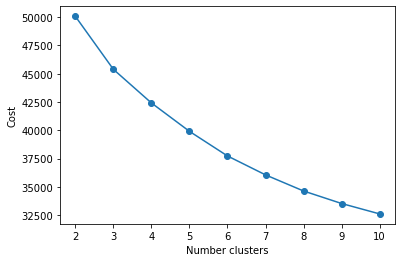

In [172]:
# #2. Optimal nr of clusters
# # #Cost
nb_clusters = [2,3,4,5,6,7,8,9, 10]
costs = []
for n in nb_clusters:
    kprot = KPrototypes(n_clusters = n, verbose = 0, max_iter = 20)
    clusters = kprot.fit_predict(df_opt, categorical = [0,1,2,3,4])
    costs.append(kprot.cost_)
#     try:
#         kprot = KPrototypes(n_clusters = n, verbose = 0, max_iter = 20)
#         clusters = kprot.fit_predict(df_opt, categorical = [0,1,2,3,4])
#         cost.append(kprot.cost_)
#     except:
#         print(f"Can´t cluster with {n} clusters")
    
plt.plot(nb_clusters, costs, marker = "o")
plt.xlabel("Number clusters")
plt.ylabel("Cost")

In [182]:
###Dimensionality reduction using a method suitable for a mixed dataset called Factor Analysis of Mixed Data (FAMD)
from prince import FAMD
famd = FAMD(n_components= 2, n_iter = 3, random_state= 101)
famd.fit(df_opt)
X_sc_PCA = famd.transform(df_opt)
X_sc_PCA

,0,1
0,-0.731809,-0.749932
1,1.217591,-0.365827
2,-1.499803,0.184987
3,-1.167199,1.618215
4,-0.734032,-1.084076
...,...,...
6812,-0.736119,-0.102941
6813,0.709028,-0.602532
6814,-0.549248,1.205138
6815,-0.227018,-1.058081


In [183]:
X_sc_PCA.iloc[:,0]

0      -0.731809
1       1.217591
2      -1.499803
3      -1.167199
4      -0.734032
          ...   
6812   -0.736119
6813    0.709028
6814   -0.549248
6815   -0.227018
6816    0.814262
Name: 0, Length: 6817, dtype: float64

In [ ]:
famd.explained_inertia_

Text(0, 0.5, 'PCA 2')

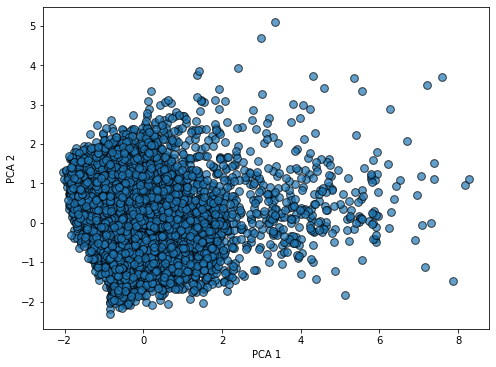

In [184]:
#Visulizing
#Visualization of the dataset in terms of the two pca components
plt.figure(figsize = (8,8))

plt.scatter(X_sc_PCA.iloc[:,0], X_sc_PCA.iloc[:,1], s = 60, edgecolors = "black", alpha = 0.7)
plt.gca().set_aspect("equal")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


In [201]:
#Testeamos ahora 3 componentes
famd = FAMD(n_components= 3, n_iter = 15, random_state= 101)
famd.fit(df_opt)
X_sc_PCA = famd.transform(df_opt)
X_sc_PCA

,0,1,2
0,-0.634336,-0.932587,1.573241
1,1.115599,-0.175059,0.440379
2,-1.340786,0.122173,0.396001
3,-1.165604,0.957870,-0.753265
4,-0.719341,-0.702606,-0.900992
...,...,...,...
6812,-0.790151,-0.342187,-1.002049
6813,0.634861,-0.579758,-0.185508
6814,-0.409333,1.441452,-0.093476
6815,-0.135379,-1.436135,0.253999


In [202]:
#Plotting in 3d
famd.explained_inertia_

array([0.00077983, 0.00047929, 0.00040802])

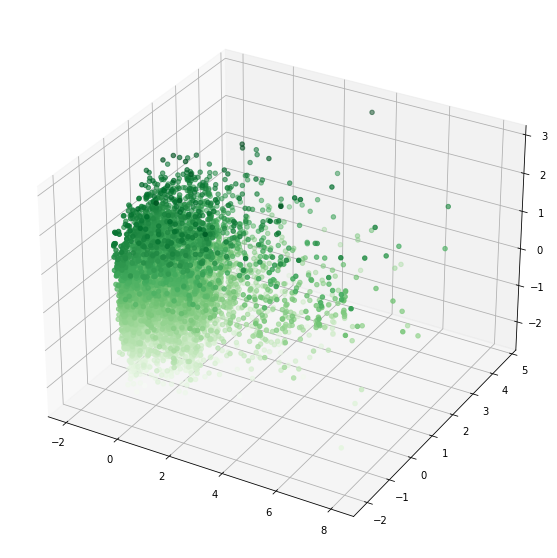

In [203]:
from mpl_toolkits import mplot3d

# ax = plt.axes(projection='3d')

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(X_sc_PCA.iloc[:,0], X_sc_PCA.iloc[:,1], X_sc_PCA.iloc[:,2], c= X_sc_PCA.iloc[:,2], cmap='Greens');


In [199]:
##Se ve muy probre la explainability. Revisar...